In this notebook, we do a quick exploration of a dataset from the [TidyTuesday event](https://github.com/rfordatascience/tidytuesday). In this event they post a new dataset every Tuesday for the R4DS Online Learning Community. They release quite interesting datasets which are useful for learning R (and even Python).

We use the yearly dataset [Week 31 - R and Package download stats](https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-10-30) which contains anonymized R language downloads from the RStudio CRAN mirror between October 20, 2017 and October 20, 2018. It consists on the following variables:

* **date**: date of download (y-m-d).
* **time**: time of download (in UTC).
* **size**: size (in bytes).
* **version**: R release version.
* **os**: Operating System.
* **country**: Two letter ISO country code.
* **ip_id**: Anonymized daily ip code (unique identifier).



In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')

# Figures inline and set visualization style
%matplotlib inline

Downlod the data from [Week 31 - R and Package download stats](https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-10-30) and save it to a folder called *data*.

In [2]:
df = pd.read_csv("data/r_downloads_year.csv")

In [3]:
#Check shape of the data
df.shape

(938115, 8)

## Data cleaning

It looks like we have an extra variable, it might be some integer Id.

In [4]:
df.head()

,Unnamed: 0,date,time,size,version,os,country,ip_id
0,1,2017-10-23,14:29:18,78171332,3.4.2,win,ES,1
1,2,2017-10-23,14:29:22,20692638,3.4.2,win,PT,2
2,3,2017-10-23,14:29:57,972075,3.4.2,win,PL,3
3,4,2017-10-23,14:30:00,1032203,3.0.3,win,JP,4
4,5,2017-10-23,14:30:18,78171332,3.4.2,win,CN,5


We remove the first column since it is an integer Id as well as ip_id (anonymized daily ip code).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938115 entries, 0 to 938114
Data columns (total 8 columns):
Unnamed: 0    938115 non-null int64
date          938115 non-null object
time          938115 non-null object
size          938115 non-null int64
version       938115 non-null object
os            935517 non-null object
country       915601 non-null object
ip_id         938115 non-null int64
dtypes: int64(3), object(5)
memory usage: 57.3+ MB


In [6]:
df.drop(['Unnamed: 0', 'ip_id'], axis = 1, inplace = True)

In [7]:
df.head()

,date,time,size,version,os,country
0,2017-10-23,14:29:18,78171332,3.4.2,win,ES
1,2017-10-23,14:29:22,20692638,3.4.2,win,PT
2,2017-10-23,14:29:57,972075,3.4.2,win,PL
3,2017-10-23,14:30:00,1032203,3.0.3,win,JP
4,2017-10-23,14:30:18,78171332,3.4.2,win,CN


Notice that we have separate columns for date and time. It is more usefull to we have a column that contains both the date and time R was downloaded.

We combine date and time into date_time and transform it to pandas datetime.

In [8]:
df['date_time'] = df.date.str.cat(df.time, sep = ' ')
df['date_time'] = pd.to_datetime(df['date_time'])

In [9]:
df.head()

,date,time,size,version,os,country,date_time
0,2017-10-23,14:29:18,78171332,3.4.2,win,ES,2017-10-23 14:29:18
1,2017-10-23,14:29:22,20692638,3.4.2,win,PT,2017-10-23 14:29:22
2,2017-10-23,14:29:57,972075,3.4.2,win,PL,2017-10-23 14:29:57
3,2017-10-23,14:30:00,1032203,3.0.3,win,JP,2017-10-23 14:30:00
4,2017-10-23,14:30:18,78171332,3.4.2,win,CN,2017-10-23 14:30:18


## Operative systems

We plot this variable to see its distribution.

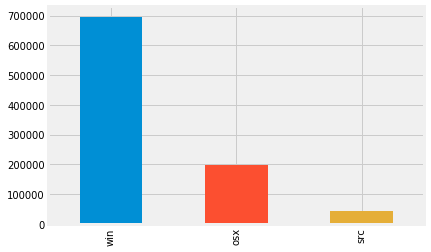

In [10]:
df['os'].value_counts().plot(kind = 'bar');

We can tell that Windows is used by a large proportion of R users. OS X is in second place whereas open source operating systems (src) are used by few R users.

## Country

From which countries are R Users? We select the top 20 countries.

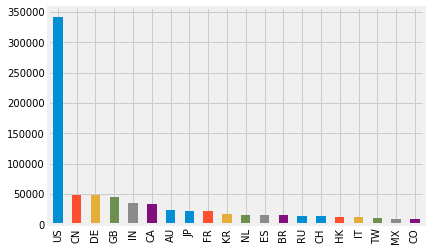

In [11]:
df['country'].value_counts()[:20].plot(kind = 'bar');

Most of the downloads come from the US, which might be due to the population size. 

## Which operative systems are used in the different countries? 

To answer this question, we select the top 20 countries and compute a cross table that accounts the different operative systems.

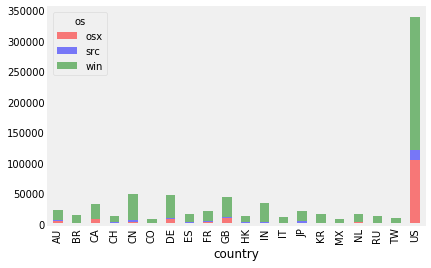

In [12]:
#Get a list of the top 20 countries
top_20 = df['country'].value_counts()[:20].index.tolist()

#Select the top 20 countries from the dataset
top_20_data = df[df.country.isin(top_20)]

#Compute top_20_data crosstable (country, os) and plot it
top_20_country_os = pd.crosstab(top_20_data['country'], top_20_data['os'])

top_20_country_os.plot(kind='bar', stacked=True, color=['red','blue','green'], grid=False,alpha=0.5);

We see a similar trend in the U.S. as the overall one. 

Since a large proportion of data comes from the U.S., the plot doesn't show the rest of the countries with enough detail. We remove this country from the plot.

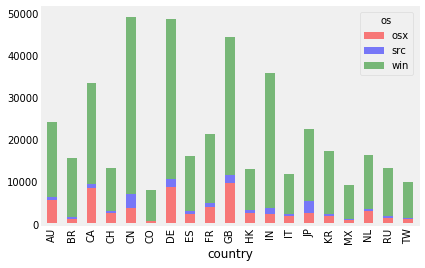

In [13]:
top_2_20 = df['country'].value_counts()[1:20].index.tolist()

#Select the top 20 countries from the dataset
top_2_20_data = df[df.country.isin(top_2_20)]

#Compute top_20_data crosstable (country, os) and plot it
top_2_20_country_os = pd.crosstab(top_2_20_data['country'], top_2_20_data['os'])

top_2_20_country_os.plot(kind='bar', stacked=True, color=['red','blue','green'], grid=False,alpha=0.5);

There are a few contries in which open source operative system are not very popular such as CO (Colombia), MX (México) and TW (Taiwan).  This is a interesting point that might be worth keeping an eye on.

## Version

What is the distribution of version?

In [14]:
df['version'].value_counts()

3.5.1           284668
3.4.3           235119
3.5.0           136961
3.4.4           100787
3.4.2            96090
3.3.3            24727
latest           19000
3.5.1patched     11781
3.4.1             3932
devel             3418
3.2.1             3122
3.2.4             2630
3.4.0             2560
3.2.2             1458
3.3.2             1159
3.0.3              936
3.2.5              856
3.3.0              783
3.1.2              742
3.2.3              688
3.3.1              539
3.1.3              538
3.2.0              398
3.1.0              375
3.0.1              364
3.1.1              325
2.15.1             314
2.15.3             285
3.0.0              285
2.11.0             277
                 ...  
3.4.4patched        24
2.9.0               23
2.3.0               20
2.9.2               20
2.2.0               20
2.7.0               19
2.8.1               18
2.5.1               18
2.6.0               18
2.5.0               18
2.3.1               17
2.9.1               17
2.7.1      

Different versions are released throughout a software development process. This versioning system contains different types such as patched, latest, devel, alpha and beta. The dataset contains more information about newest versions (perhaps the ones released during Oct 2017 to Oct 2018?). We plot the top 10 versions.

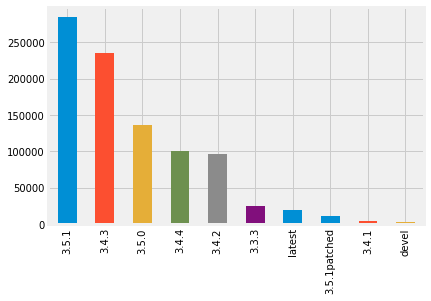

In [15]:
df['version'].value_counts()[:10].plot(kind = 'bar');

It is likely that version 3.5.1 is the latest since it was the most downloaded during this period of time.

## Time series

A first question to ask is how many downloads do we have per year, month, day and time of the day? There might be some periods during the year that R is downloaded the most.

### Downloads per year

The  more information we can extract from a datetime variable the better. We may discover some intersting hidden information. We add year as a variable so we can make a bar plot.

In [16]:
df['year'] = df.date_time.dt.year

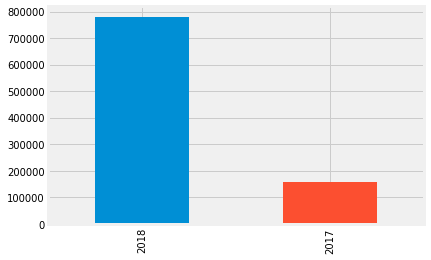

In [17]:
df['year'].value_counts().plot(kind = 'bar');

The majority of the downloads were made in 2018. The reason is that we only have data from Oct - Dec 2017. 

Do we have a similar pattern in a particular period of time for both 2017 and 2018? Let's look at October.

In [18]:
#Add month as a variable
df['month'] = df.date_time.dt.month

#Check new variable
df.month.value_counts()

10    128213
9     120909
1      84320
3      83052
4      78522
5      69473
2      68940
11     67353
8      64574
12     59948
7      59545
6      53266
Name: month, dtype: int64

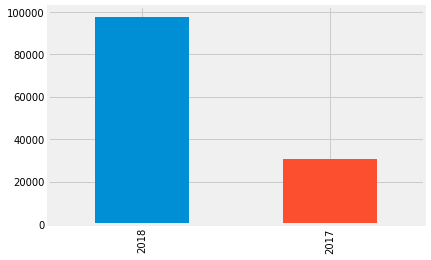

In [19]:
#Select October 
period_oct = df[df.month.isin([10])]

period_oct['year'].value_counts().plot(kind = 'bar');

The plot above shows that we have more downloads in October 2018 than Octuber 2017. Do we have complete data both October 2017 and October 2018? 

In [20]:
df['day'] = df.date_time.dt.day

In [21]:
period_oct = df[df.month.isin([10])]

pd.crosstab(period_oct.day, period_oct.year)

year,2017,2018
day,,
1,0,6131
2,0,6285
3,0,6084
4,0,5721
5,0,4815
6,0,2938
7,0,3132
8,0,5437
9,0,5777


As you can see, we only have data for 20th day, this makes it impossible to compare a similar period of time for different year.

### Downloads per time of the day

In [22]:
df['hour'] = df.date_time.dt.hour

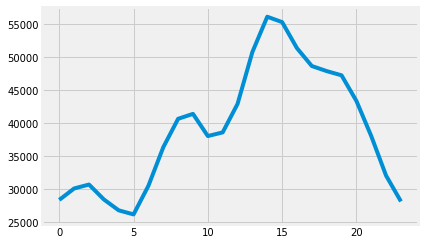

In [23]:
df['hour'].value_counts().sort_index().plot();

Most downloads happen in the afternoon (after lunch time). After 8 pm, the number of downloads start declining. If we were to advice some time for server maintenance, it would be around 4 to 6 am. 

### Downloads per time of the day and operative system 

Do people using open source operative systems tend to work late in the evening?

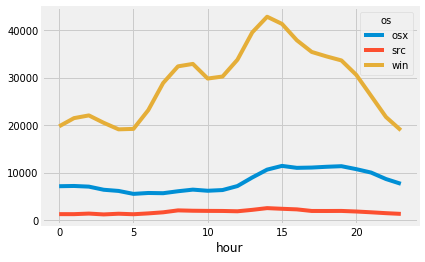

In [24]:
pd.crosstab(df.hour, df.os).plot();

Download patters are very different for each operative system. Open source os users tend to work throughout the day whereas Windows and OS X users prefer to work in the afternoon - evening.

From this analysis, we conclude that it might be interesting to have a dashboard to monitor the following metrics:

* Total number of downloads.
* Proportion of operative systems.
* Top 20 countries downloads are from.
* Number of downloads per time of the day.